In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [90]:
songs = pd.read_csv('data/df_audio_features_1000.csv')

In [91]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1387 non-null   object 
 1   artist            1387 non-null   object 
 2   danceability      1387 non-null   float64
 3   energy            1387 non-null   float64
 4   key               1387 non-null   int64  
 5   loudness          1387 non-null   float64
 6   mode              1387 non-null   int64  
 7   speechiness       1387 non-null   float64
 8   acousticness      1387 non-null   float64
 9   instrumentalness  1387 non-null   float64
 10  liveness          1387 non-null   float64
 11  valence           1387 non-null   float64
 12  tempo             1387 non-null   float64
 13  duration_ms       1387 non-null   int64  
 14  time_signature    1387 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 162.7+ KB


In [92]:
songs.set_index(['name','artist'], inplace = True)

In [ ]:
songs.drop(['key','time_signature','duration_ms',])

In [93]:
minmax = MinMaxScaler(feature_range=(0,1))

In [94]:
songs_scaled_minmax = minmax.fit_transform(songs)

In [95]:
songs_scaled_minmax = pd.DataFrame(songs_scaled_minmax, columns = songs.columns, index = songs.index)

In [96]:
songs_scaled_minmax.shape

(1387, 13)

Text(0.5, 1.0, 'Data with MinMaxScaler')

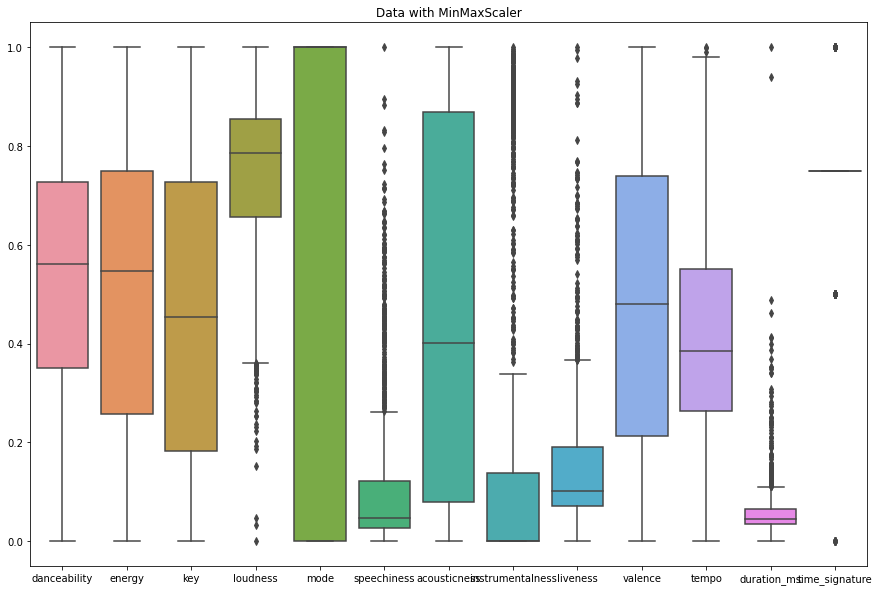

In [97]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_minmax.loc[:, songs.columns]).set_title('Data with MinMaxScaler')

In [14]:
maxabs = MaxAbsScaler()

In [15]:
songs_scaled_maxabs = maxabs.fit_transform(songs)

In [16]:
songs_scaled_maxabs = pd.DataFrame(songs_scaled_maxabs, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with MaxAbsScaler')

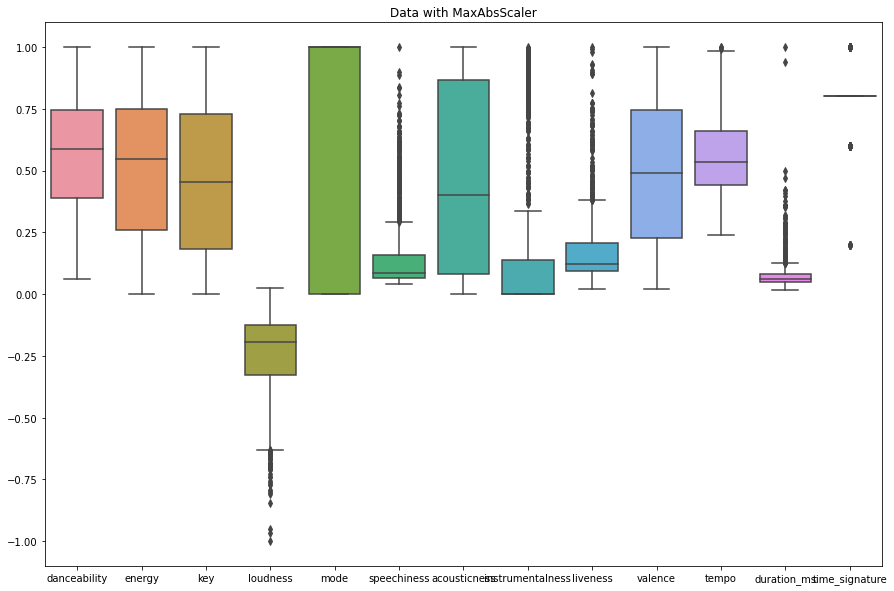

In [17]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_maxabs.loc[:, songs.columns]).set_title('Data with MaxAbsScaler')

In [18]:

robustscaler = RobustScaler()

In [19]:
songs_scaled_robustscaler = robustscaler.fit_transform(songs)

In [20]:
songs_scaled_robustscaler = pd.DataFrame(songs_scaled_robustscaler, columns = songs.columns, index = songs.index)

Text(0.5, 1.0, 'Data with RobustScaler')

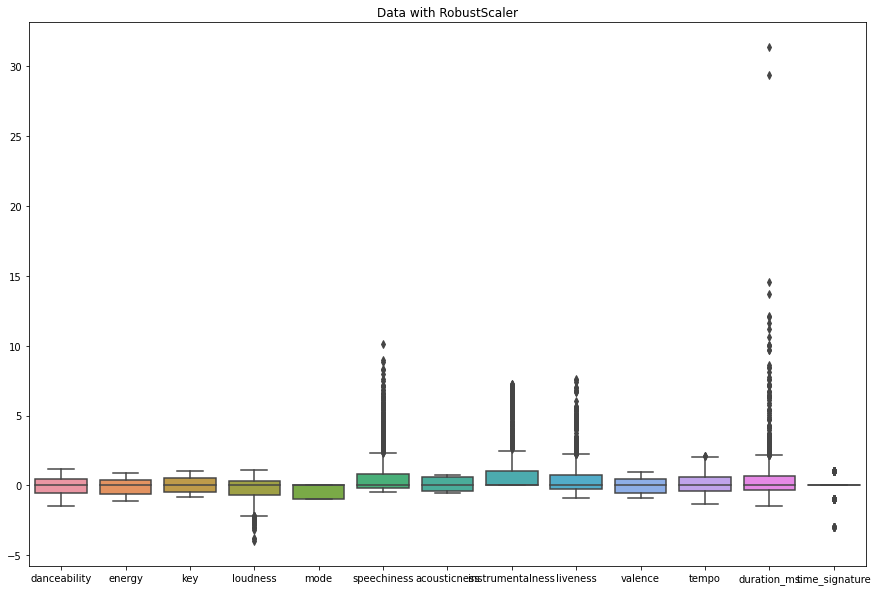

In [21]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_robustscaler.loc[:, songs.columns]).set_title('Data with RobustScaler')

In [106]:
quantiletrans = QuantileTransformer()

songs_scaled_quantiletrans = quantiletrans.fit_transform(songs)

songs_scaled_quantiletrans = pd.DataFrame(songs_scaled_quantiletrans, columns = songs.columns, index = songs.index)

In [107]:
songs_scaled_quantiletrans.shape

(1387, 13)

Text(0.5, 1.0, 'Data with QuantileTransformer')

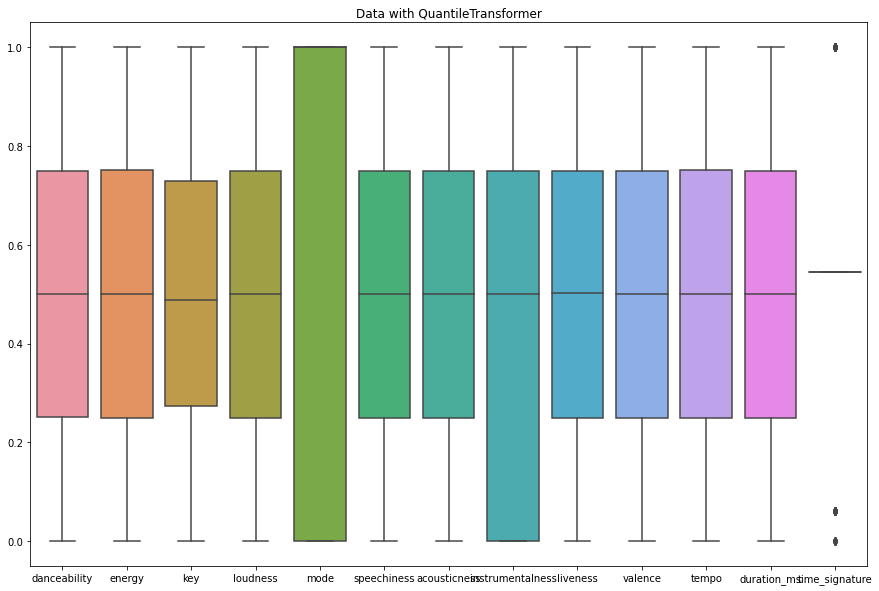

In [108]:
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_quantiletrans.loc[:, songs.columns]).set_title('Data with QuantileTransformer')

In [29]:
from sklearn.cluster import KMeans

In [31]:
songs_kmeans = KMeans(n_clusters=5)
songs_kmeans.fit(songs_scaled_minmax)
songs_scaled_minmax['cluster'] = songs_kmeans.labels_

In [32]:
songs_scaled_minmax

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.181818,0.723440,1.0,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,0.016023,0.75,0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75,0
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75,0
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75,0
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,1.0,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,0.248397,0.75,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.545455,0.495329,1.0,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,0.211094,0.75,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,1.0,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,0.046743,0.50,2


In [46]:
test_sample = songs_scaled_minmax.groupby('cluster').sample(3)

In [85]:
test_sample

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
"Symphony, Op. 21: I. Ruhig schreitend",Anton Webern,0.122070,0.005793,0.727273,0.337166,1.0,0.039978,0.972892,0.070761,0.590376,0.015952,0.301071,0.086004,0.00,0
Vincent,Don McLean,0.397391,0.085323,0.636364,0.549977,1.0,0.023517,0.911646,0.000005,0.331121,0.454112,0.267009,0.048157,0.50,0
Sixteen Tons,Tennessee Ernie Ford,0.700354,0.325287,1.000000,0.644545,1.0,0.328871,0.799196,0.000000,0.233641,0.375388,0.603043,0.025459,0.75,0
In Da Club,50 Cent,0.928129,0.715858,0.545455,0.915654,0.0,0.620116,0.256022,0.000000,0.051955,0.784545,0.257700,0.034828,0.75,1
Fever,Peggy Lee,0.754533,0.090243,0.818182,0.554373,0.0,0.243849,0.090962,0.000000,0.095717,0.343277,0.560476,0.036924,0.75,1
The Real Slim Shady,Eminem,0.983414,0.663648,0.454545,0.882856,0.0,0.061505,0.030319,0.000000,0.025614,0.766936,0.349978,0.059004,0.75,1
Symphonia: Sum Fluxae Pretium Spei: 2. Adagio tenebroso,Elliott Carter,0.139761,0.065142,0.181818,0.485283,1.0,0.030933,0.872490,0.622335,0.064814,0.014398,0.550835,0.263169,0.50,2
"The Planets - Suite for large orchestra, Op.32: I. Mars, the Bringer of War (Allegro)",Gustav Holst,0.153030,0.297174,0.000000,0.539711,1.0,0.034913,0.763052,0.924873,0.364306,0.053449,0.661565,0.101924,1.00,2
Pop 1,GAS,0.016807,0.041145,0.454545,0.567673,1.0,0.031295,0.927711,0.962437,0.070829,0.420965,0.209687,0.066294,0.50,2


0 - classic, slow rock, country
1 - rap
2 - classic, ambient
3 - 

### Evaluate when checking the distance between centroids

With siluatthe and inertia i get 4 clusters, it seems low so I am going to try and drop some columns.

In [98]:
songs_scaled_minmax = songs_scaled_minmax.drop('duration_ms',axis = 1)

Dropping duration_ms didn't change much. Let's try something else

In [99]:
songs_scaled_minmax = songs_scaled_minmax.drop('time_signature', axis = 1)

In [100]:
songs_scaled_minmax = songs_scaled_minmax.drop('mode', axis = 1)

In [101]:
songs_scaled_minmax.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

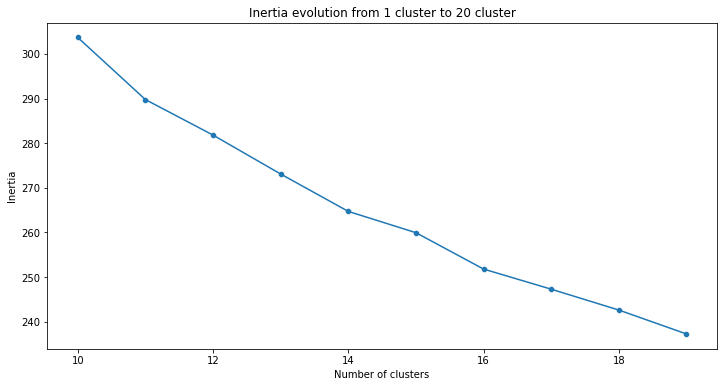

In [115]:
max_k = 20
min_k = 10
inertia = []

for k in range(min_k, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_minmax).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(min_k, max_k), y=inertia)
sns.scatterplot(x=range(min_k, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Silhouette Score

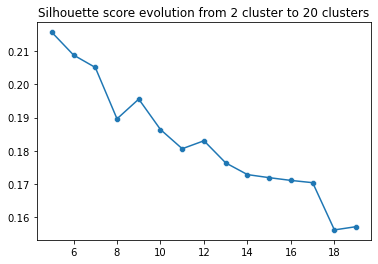

In [116]:
from sklearn.metrics import silhouette_score
max_k = 20
min_k = 5
sil_score = []

for k in range(min_k, max_k): 
    labels = KMeans(n_clusters=k).fit(songs_scaled_minmax).labels_
    sil_score.append(silhouette_score(songs_scaled_minmax, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(min_k, max_k), y=sil_score)
sns.scatterplot(x=range(min_k, max_k), y=sil_score)
plt.show()

In [109]:
songs_scaled_quantiletrans = songs_scaled_quantiletrans.drop('duration_ms',axis = 1)

Dropping duration_ms didn't change much. Let's try something else

In [110]:
songs_scaled_quantiletrans = songs_scaled_quantiletrans.drop('time_signature', axis = 1)

In [111]:
songs_scaled_quantiletrans = songs_scaled_quantiletrans.drop('mode', axis = 1)

In [112]:
songs_scaled_quantiletrans.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

C:\Users\HANA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


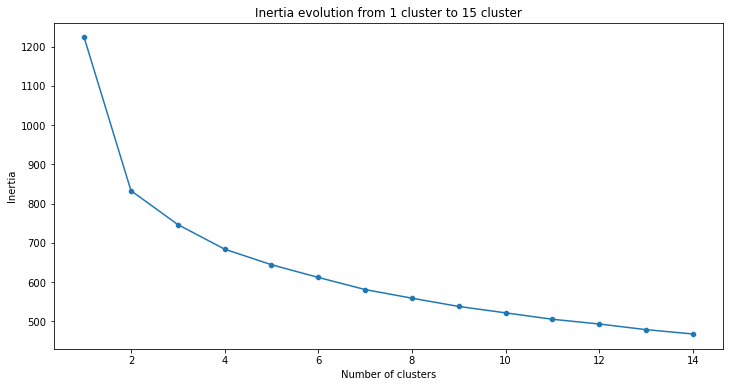

In [113]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(songs_scaled_quantiletrans).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Silhouette Score

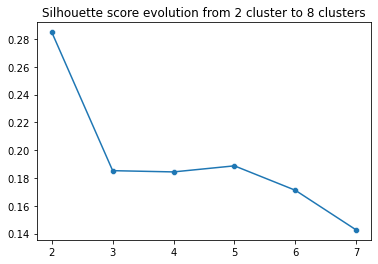

In [114]:
from sklearn.metrics import silhouette_score
max_k = 8
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(songs_scaled_quantiletrans).labels_
    sil_score.append(silhouette_score(songs_scaled_quantiletrans, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

In [118]:
songs_kmeans = KMeans(n_clusters=13)
songs_kmeans.fit(songs_scaled_minmax)
songs_scaled_minmax['cluster'] = songs_kmeans.labels_

In [119]:
songs_scaled_minmax

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,,
Don't Be Cruel,Elvis Presley,0.704777,0.552200,0.181818,0.723440,0.281838,0.859437,0.000035,0.072592,0.853947,0.224187,11
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,11
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,7
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,11
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,7
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.157452,0.069660,0.272727,0.461981,0.043596,0.920683,0.725888,0.064814,0.047545,0.244005,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.141973,0.101387,0.545455,0.495329,0.037988,0.858433,0.432487,0.050503,0.016470,0.213537,8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.000000,0.000913,0.818182,0.031808,0.036541,0.954819,0.983756,0.058592,0.015330,0.139723,8


In [120]:
test_sample = songs_scaled_minmax.groupby('cluster').sample(3)

In [121]:
test_sample

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,,
"Dido and Aeneas, Z.626 / Act 3: ""Thy hand, Belinda...When I am laid in earth""",Henry Purcell,0.216055,0.096367,0.636364,0.547867,0.048661,0.982932,0.002528,0.148605,0.015227,0.519314,0
Stella By Starlight (feat. John Coltrane & Bill Evans),Miles Davis,0.453782,0.144561,0.909091,0.694247,0.024059,0.915662,0.000120,0.078606,0.231407,0.224091,0
All of Me,John Legend,0.400708,0.265045,0.727273,0.820866,0.016281,0.925703,0.000000,0.115421,0.322561,0.448469,0
Don't Give Up,Barrington Levy,0.851835,0.468865,0.818182,0.735750,0.130427,0.055319,0.000017,0.047184,0.846696,0.580243,1
Lovely Day,Bill Withers,0.699248,0.653607,0.818182,0.794421,0.016643,0.293171,0.002447,0.087421,0.711001,0.307960,1
Timber (feat. Ke$ha),Pitbull,0.576515,0.966867,1.000000,0.886307,0.135492,0.029616,0.000000,0.122680,0.795940,0.512712,1
Fu-Gee-La,Fugees,0.687085,0.507018,0.090909,0.718758,0.207670,0.137548,0.000000,0.221197,0.392998,0.257074,2
Scenario,A Tribe Called Quest,0.813136,0.602402,0.181818,0.668308,0.574891,0.112448,0.000174,0.093643,0.635384,0.332586,2
Never Alone,Tori Kelly,0.554401,0.543163,0.090909,0.786419,0.204052,0.246986,0.000003,0.157938,0.550445,0.263382,2


0 - classic, slow rock, country
1 - rap
2 - classic, ambient
3 - 